In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import ast
import re
# from tgess.src.data_science.plots import *

In [180]:
def get_df_from_files(path):
    # Select all csv files
    csv_files = [f for f in os.listdir(path) if f.endswith(".csv")]

    # For each file:
    df = []
    for csv_file in csv_files:
        # Read data and append to list
        filename = os.path.join(path, csv_file)
        temp_df = pd.read_csv(filename)
        if "experiment_name" not in temp_df.columns:
            temp_df["experiment_name"]="standard"
            
        temp_df["train_samples"] = int(re.findall(r'\d+', csv_file)[0])
        df.append(temp_df)

    # Convert list of dataframes to dataframe
    df = pd.concat(df, axis=0, ignore_index=True)
    return df

In [181]:
figsize_x = 7
figsize_y = 7
title_fontsize = 20
label_fontsize = 14
tick_fontsize = 14
legend_fontsize = 14
cmap = "coolwarm"

In [182]:
results_path = "../data/archived_results/results_23-11-2021/results"

In [183]:
plots_path = "../data/archived_results/plots"

In [184]:
df = get_df_from_files(results_path)

In [185]:
def get_estimator(x):
    if "include_estimators" in ast.literal_eval(x):
        return ast.literal_eval(x)["include_estimators"]
    else:
        return "proposed"
    
def get_ensemble_size(x):
    if "ensemble_size" in ast.literal_eval(x):
        return ast.literal_eval(x)["ensemble_size"]
    else:
        return 1

In [186]:
df.columns

Index(['Unnamed: 0', 'in_situ_dataset', 'simulation_dataset',
       'simulation_samples', 'simulation_config', 'model_type', 'model_config',
       'ensemble', 'experiment_name', 'train_mean_absolute_error',
       'test_mean_absolute_error', 'train_mean_squared_error',
       'test_mean_squared_error', 'train_r2_score', 'test_r2_score',
       'train_mean_absolute_percentage_error',
       'test_mean_absolute_percentage_error', 'tune_time', 'train_time',
       'test_time', 'run_id', 'train_samples'],
      dtype='object')

In [187]:
df["estimator"] = df["model_config"].apply(get_estimator)
df["ensemble_size"] = df["model_config"].apply(get_ensemble_size)
# df["train_samples"] = df.apply(lambda x: int(re.findall(r'\d+', x["experiment_name"])[0]), axis=1)

In [188]:
df["in_situ_dataset"].value_counts()

GBOV_RM07_in_situ.csv              626
NFI_Sweden/in_situ_inc_SAR.csv     562
in_situ_MERIS.csv                  480
in_situ_weekly_10m_filtered.csv    376
Name: in_situ_dataset, dtype: int64

In [189]:
df["estimator"].value_counts()

proposed                                                                                                                                                                                        670
['gaussian_process']                                                                                                                                                                            341
['random_forest']                                                                                                                                                                               336
['adaboost', 'ard_regression', 'decision_tree', 'extra_trees', 'gaussian_process', 'gradient_boosting', 'k_nearest_neighbors', 'liblinear_svr', 'libsvm_svr', 'mlp', 'random_forest', 'sgd']    332
['mlp']                                                                                                                                                                                         327
['ActiveLearningGaus

In [190]:
df["experiment_name"].value_counts()

standard     1260
custom        670
gbov_250       25
gbov_50        24
gbov_100       24
gbov_2500      21
gbov_1000      20
Name: experiment_name, dtype: int64

In [191]:
ask5 = df[df["estimator"]=="['adaboost', 'ard_regression', 'decision_tree', 'extra_trees', 'gaussian_process', 'gradient_boosting', 'k_nearest_neighbors', 'liblinear_svr', 'libsvm_svr', 'mlp', 'random_forest', 'sgd']"]
rf = df[df["estimator"]=="['random_forest']"]
mlp = df[df["estimator"]=="['mlp']"]
gpr_al = df[df["estimator"]=="['ActiveLearningGaussianProcessRegression']"]

In [192]:
def label_estimators(x):
    
    if x["experiment_name"]=="custom":
        if x["model_type"] == "Proposed ensemble":
            x["model"] = "Proposed + ensemble"
        else:
            x["model"] = "Proposed"
    elif x["estimator"]=="['adaboost', 'ard_regression', 'decision_tree', 'extra_trees', 'gaussian_process', 'gradient_boosting', 'k_nearest_neighbors', 'liblinear_svr', 'libsvm_svr', 'mlp', 'random_forest', 'sgd']":
        x["model"] = "Auto-sklearn"
        
    elif x["estimator"]=="['random_forest']":
        x["model"] = "Random forest"
        
    elif x["estimator"]=="['mlp']":
        x["model"] = "Multilayer perceptron"
        
    elif x["estimator"]=="['ActiveLearningGaussianProcessRegression']":
        x["model"] = "Gaussian process regression"
        
    elif x["estimator"]=="['gaussian_process']":
        x["model"] = "Gaussian process regression"
        
    elif x["model_type"] == "GPR":
        x["model"] = "Gaussian process regression"
        
    else:
        x["estimator"] = "Other"
        
    return x


In [193]:
df[df["model_type"]=="Proposed ensemble"]

,Unnamed: 0,in_situ_dataset,simulation_dataset,simulation_samples,simulation_config,model_type,model_config,ensemble,experiment_name,train_mean_absolute_error,...,test_r2_score,train_mean_absolute_percentage_error,test_mean_absolute_percentage_error,tune_time,train_time,test_time,run_id,train_samples,estimator,ensemble_size
85,0,NFI_Sweden/in_situ_inc_SAR.csv,PROSAIL_LUT_S2_100000_evergreenForest.csv,100000,generic,Proposed ensemble,"{'automl': ""AutoSklearnRegressor(delete_tmp_fo...","[""[(0.800000, SimpleRegressionPipeline({'data_...",custom,57469.849022,...,0.199668,1.442267e+19,1.414083e+19,0.000006,3193.338165,2.089747,0,1000,proposed,1
86,0,NFI_Sweden/in_situ_inc_SAR.csv,PROSAIL_LUT_S2_100000_evergreenForest.csv,100000,generic,Proposed ensemble,"{'automl': ""AutoSklearnRegressor(delete_tmp_fo...","[""[(0.400000, SimpleRegressionPipeline({'data_...",custom,49650.527703,...,0.217074,9.890590e+18,1.192662e+19,0.000006,4408.943082,3.299625,1,1000,proposed,1
87,0,NFI_Sweden/in_situ_inc_SAR.csv,PROSAIL_LUT_S2_100000_evergreenForest.csv,100000,generic,Proposed ensemble,"{'automl': ""AutoSklearnRegressor(delete_tmp_fo...","[""[(0.400000, SimpleRegressionPipeline({'data_...",custom,45753.517262,...,0.215925,9.460105e+18,1.299841e+19,0.000006,3236.138589,11.251388,2,1000,proposed,1
88,0,NFI_Sweden/in_situ_inc_SAR.csv,PROSAIL_LUT_S2_100000_evergreenForest.csv,100000,generic,Proposed ensemble,"{'automl': ""AutoSklearnRegressor(delete_tmp_fo...","[""[(0.600000, SimpleRegressionPipeline({'data_...",custom,43836.579674,...,0.213641,1.015842e+19,1.171863e+19,0.000006,3136.232824,654.636881,3,1000,proposed,1
89,0,NFI_Sweden/in_situ_inc_SAR.csv,PROSAIL_LUT_S2_100000_evergreenForest.csv,100000,generic,Proposed ensemble,"{'automl': ""AutoSklearnRegressor(delete_tmp_fo...","[""[(0.600000, SimpleRegressionPipeline({'data_...",custom,51349.402164,...,0.207245,1.445021e+19,1.250467e+19,0.000004,5134.829507,2.858286,4,1000,proposed,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,0,in_situ_weekly_10m_filtered.csv,PROSAIL_LUT_Sentinel2_100000_winter_wheat.csv,100000,generic,Proposed ensemble,"{'automl': ""AutoSklearnRegressor(delete_tmp_fo...","[(0.600000, SimpleRegressionPipeline({'data_pr...",custom,0.480910,...,-0.028620,7.478729e-02,1.806070e-01,0.006859,2464.722784,6.257179,10,50,proposed,1
2040,0,in_situ_weekly_10m_filtered.csv,PROSAIL_LUT_Sentinel2_100000_winter_wheat.csv,100000,generic,Proposed ensemble,"{'automl': ""AutoSklearnRegressor(delete_tmp_fo...","[(0.600000, SimpleRegressionPipeline({'data_pr...",custom,0.579423,...,0.064358,8.741176e-02,2.080342e-01,0.005617,3056.561026,2.449614,11,50,proposed,1
2041,0,in_situ_weekly_10m_filtered.csv,PROSAIL_LUT_Sentinel2_100000_winter_wheat.csv,100000,generic,Proposed ensemble,"{'automl': ""AutoSklearnRegressor(delete_tmp_fo...","[(0.600000, SimpleRegressionPipeline({'data_pr...",custom,0.544809,...,0.133609,7.427879e-02,1.859133e-01,0.005419,2021.517092,1763.179357,12,50,proposed,1
2042,0,in_situ_weekly_10m_filtered.csv,PROSAIL_LUT_Sentinel2_100000_winter_wheat.csv,100000,generic,Proposed ensemble,"{'automl': ""AutoSklearnRegressor(delete_tmp_fo...","[(0.800000, SimpleRegressionPipeline({'data_pr...",custom,0.505617,...,-0.113605,6.773363e-02,1.993927e-01,0.008842,2410.864560,129.478964,13,50,proposed,1


In [194]:
df["model_type"].value_counts()

AutoSklearnRegressor    1636
Proposed ensemble        298
GPR                      101
Proposed                   9
Name: model_type, dtype: int64

In [195]:
df["estimator"].value_counts()

proposed                                                                                                                                                                                        670
['gaussian_process']                                                                                                                                                                            341
['random_forest']                                                                                                                                                                               336
['adaboost', 'ard_regression', 'decision_tree', 'extra_trees', 'gaussian_process', 'gradient_boosting', 'k_nearest_neighbors', 'liblinear_svr', 'libsvm_svr', 'mlp', 'random_forest', 'sgd']    332
['mlp']                                                                                                                                                                                         327
['ActiveLearningGaus

In [196]:
df["experiment_name"].value_counts()

standard     1260
custom        670
gbov_250       25
gbov_50        24
gbov_100       24
gbov_2500      21
gbov_1000      20
Name: experiment_name, dtype: int64

In [197]:
df = df.apply(label_estimators, axis=1)

In [198]:
df["train_samples"].value_counts()

100     446
50      436
250     434
2500    297
1000    294
0       137
Name: train_samples, dtype: int64

In [199]:
# df = df[df["model"]!="Gaussian process regression"]

In [200]:
df = df[df["experiment_name"].isin(["standard", "custom"])]

In [201]:
df = df.sort_values(by="model")

In [281]:
df["model"] = df["model"].replace({"Proposed":"Hybrid", "Proposed + ensemble":"Hybrid-ensemble"})

In [203]:
df["model"].value_counts()

Proposed                       372
Gaussian process regression    349
Random forest                  308
Auto-sklearn                   304
Multilayer perceptron          299
Proposed + ensemble            298
Name: model, dtype: int64

In [271]:
from matplotlib.ticker import FormatStrFormatter

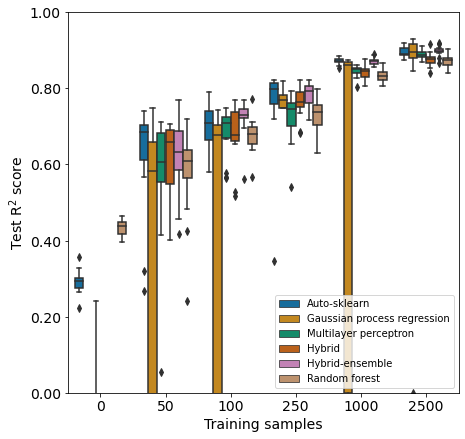

In [282]:
fig, ax = plt.subplots(figsize=(7,7))
sns.boxplot(data=df[(df["in_situ_dataset"]=="GBOV_RM07_in_situ.csv") ], x="train_samples", y="test_r2_score", hue="model", dodge=True, \
              ax=ax, palette="colorblind")
ax.set_ylim(0,1)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax.set_xlim(0, 2500)
ax.set_xlabel("Training samples")
ax.set_ylabel("Test R$^2$ score")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc="lower right", fontsize=10)
# plt.axhline(y=0, color='black', linestyle='--')
plt.savefig(os.path.join(plots_path, 'GBOV.pdf'))  
plt.show()

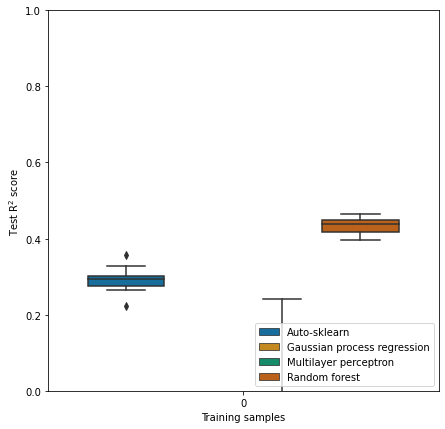

In [205]:
fig, ax = plt.subplots(figsize=(7,7))
sns.boxplot(data=df[(df["in_situ_dataset"]=="GBOV_RM07_in_situ.csv") & (df["train_samples"]==0)], x="train_samples", y="test_r2_score", hue="model", dodge=True, \
              ax=ax, palette="colorblind")
ax.set_ylim(0,1)
# ax.set_xlim(0, 2500)
# ax.set_yscale("log")
ax.set_xlabel("Training samples")
ax.set_ylabel("Test R$^2$ score")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc="lower right")
# plt.axhline(y=0, color='black', linestyle='--')
plt.savefig(os.path.join(plots_path, 'GBOV_0.pdf'))  
plt.show()

In [206]:
# df[((df["in_situ_dataset"]=="NFI_Sweden/in_situ_inc_SAR.csv") & (df["train_samples"]==50) & (df["model"]=="Proposed"))]["model_config"].iloc[0]

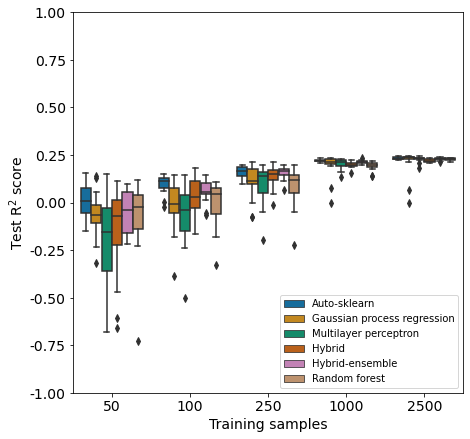

In [283]:
fig, ax = plt.subplots(figsize=(7,7))
sns.boxplot(data=df[(df["in_situ_dataset"]=="NFI_Sweden/in_situ_inc_SAR.csv") & (df["train_samples"]>0)], x="train_samples", y="test_r2_score", hue="model", dodge=True, \
              ax=ax, palette="colorblind")
ax.set_ylim(-1,1)
# ax.set_xlim(0, 2500)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

ax.set_xlabel("Training samples")
ax.set_ylabel("Test R$^2$ score")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc="lower right", fontsize=10)
plt.savefig(os.path.join(plots_path, 'AGB.pdf'))  
plt.show()

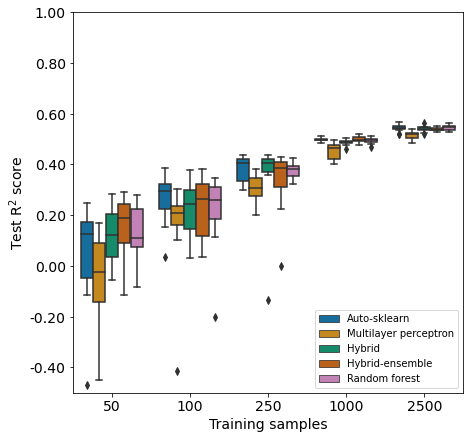

In [284]:
fig, ax = plt.subplots(figsize=(7,7))
sns.boxplot(data=df[(df["in_situ_dataset"]=="in_situ_weekly_10m_filtered.csv") & (df["train_samples"]>0)], x="train_samples", y="test_r2_score", hue="model", dodge=True, \
              ax=ax, palette="colorblind")
ax.set_ylim(-0.5,1)
# ax.set_xlim(0, 2500)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

ax.set_xlabel("Training samples")
ax.set_ylabel("Test R$^2$ score")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc="lower right", fontsize=10)
plt.savefig(os.path.join(plots_path, 'Yield.pdf'))  
plt.show()

In [209]:
df[df["in_situ_dataset"]=="in_situ_weekly_10m_filtered.csv"]["model"].value_counts()

Proposed + ensemble      77
Random forest            75
Auto-sklearn             75
Proposed                 75
Multilayer perceptron    74
Name: model, dtype: int64

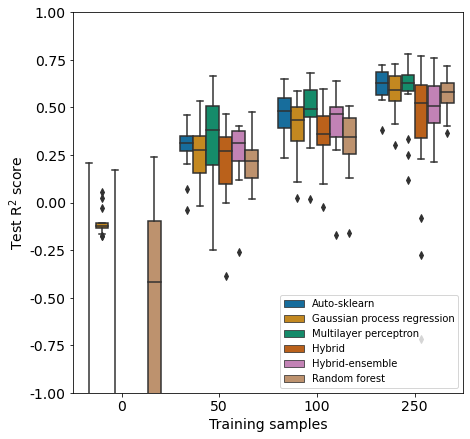

In [287]:
fig, ax = plt.subplots(figsize=(7,7))
sns.boxplot(data=df[(df["in_situ_dataset"]=="in_situ_MERIS.csv")], x="train_samples", y="test_r2_score", hue="model", dodge=True, \
              ax=ax, palette="colorblind")
ax.set_ylim(-1,1)
# ax.set_xlim(0, 2500)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

ax.set_xlabel("Training samples")
ax.set_ylabel("Test R$^2$ score")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc="lower right", fontsize=10)
plt.savefig(os.path.join(plots_path, 'Chla.pdf'))  
plt.show()

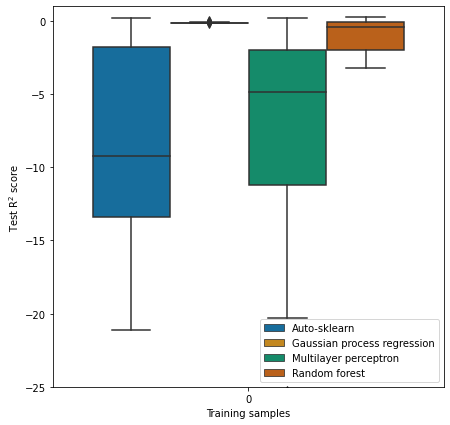

In [211]:
fig, ax = plt.subplots(figsize=(7,7))
sns.boxplot(data=df[(df["in_situ_dataset"]=="in_situ_MERIS.csv") & (df["train_samples"]==0) ], x="train_samples", y="test_r2_score", hue="model", dodge=True, \
              ax=ax, palette="colorblind")
ax.set_ylim(-25,1)
# ax.set_xlim(0, 2500)
ax.set_xlabel("Training samples")
ax.set_ylabel("Test R$^2$ score")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc="lower right")
plt.savefig(os.path.join(plots_path, 'Chla_0.pdf'))  
plt.show()

In [212]:
df["experiment_name"].value_counts()

standard    1260
custom       670
Name: experiment_name, dtype: int64

In [213]:
df["test_rmse"] = np.sqrt(df["test_mean_squared_error"])

# Bootstrapping + statistics

In [214]:
in_situ_datasets = df["in_situ_dataset"].unique()
n_samples = df["train_samples"].unique()
models = df["model"].unique()

In [215]:
models

array(['Auto-sklearn', 'Gaussian process regression',
       'Multilayer perceptron', 'Proposed', 'Proposed + ensemble',
       'Random forest'], dtype=object)

In [216]:
df["ensemble_size"].value_counts()

1    956
1    670
5    304
Name: ensemble_size, dtype: int64

In [217]:
df[df["model"]=="Proposed"]

,Unnamed: 0,in_situ_dataset,simulation_dataset,simulation_samples,simulation_config,model_type,model_config,ensemble,experiment_name,train_mean_absolute_error,...,test_mean_absolute_percentage_error,tune_time,train_time,test_time,run_id,train_samples,estimator,ensemble_size,model,test_rmse
1264,0,in_situ_MERIS.csv,simulation_MERIS.csv,100000,generic,AutoSklearnRegressor,"{'automl': ""AutoSklearnRegressor(ensemble_nbes...","[""[(0.400000, SimpleRegressionPipeline({'data_...",custom,2.170449,...,3.499177e+00,0.000005,847.214746,0.057540,6,100,proposed,1,Proposed,7.384388
1272,0,in_situ_MERIS.csv,simulation_MERIS.csv,100000,generic,AutoSklearnRegressor,"{'automl': ""AutoSklearnRegressor(ensemble_nbes...","[""[(0.600000, SimpleRegressionPipeline({'data_...",custom,2.940320,...,1.761103e+00,0.000004,531.212130,0.026604,13,100,proposed,1,Proposed,6.408892
1271,0,in_situ_MERIS.csv,simulation_MERIS.csv,100000,generic,AutoSklearnRegressor,"{'automl': ""AutoSklearnRegressor(ensemble_nbes...","[""[(0.600000, SimpleRegressionPipeline({'data_...",custom,2.558746,...,2.447474e+00,0.000005,810.142621,0.017255,12,100,proposed,1,Proposed,6.249489
1270,0,in_situ_MERIS.csv,simulation_MERIS.csv,100000,generic,AutoSklearnRegressor,"{'automl': ""AutoSklearnRegressor(ensemble_nbes...","[""[(1.000000, SimpleRegressionPipeline({'data_...",custom,2.584778,...,2.846740e+00,0.000005,696.646190,0.012903,12,100,proposed,1,Proposed,7.797241
1269,0,in_situ_MERIS.csv,simulation_MERIS.csv,100000,generic,AutoSklearnRegressor,"{'automl': ""AutoSklearnRegressor(ensemble_nbes...","[""[(1.000000, SimpleRegressionPipeline({'data_...",custom,3.227838,...,2.078329e+00,0.000004,850.198994,0.013681,11,100,proposed,1,Proposed,6.263235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,0,NFI_Sweden/in_situ_inc_SAR.csv,PROSAIL_LUT_S2_100000_evergreenForest.csv,100000,generic,AutoSklearnRegressor,"{'automl': ""AutoSklearnRegressor(ensemble_nbes...","[""[(0.400000, SimpleRegressionPipeline({'data_...",custom,64649.709695,...,1.711249e+19,0.000003,791.946636,8.133442,20,100,proposed,1,Proposed,81698.464610
127,0,NFI_Sweden/in_situ_inc_SAR.csv,PROSAIL_LUT_S2_100000_evergreenForest.csv,100000,generic,AutoSklearnRegressor,"{'automl': ""AutoSklearnRegressor(ensemble_nbes...","[""[(0.400000, SimpleRegressionPipeline({'data_...",custom,32449.503617,...,1.424754e+19,0.000007,798.151235,5.218147,19,100,proposed,1,Proposed,80727.274928
126,0,NFI_Sweden/in_situ_inc_SAR.csv,PROSAIL_LUT_S2_100000_evergreenForest.csv,100000,generic,AutoSklearnRegressor,"{'automl': ""AutoSklearnRegressor(ensemble_nbes...","[""[(0.800000, SimpleRegressionPipeline({'data_...",custom,18131.586178,...,1.118979e+19,0.000005,790.823703,3.269761,18,100,proposed,1,Proposed,85170.766577
125,0,NFI_Sweden/in_situ_inc_SAR.csv,PROSAIL_LUT_S2_100000_evergreenForest.csv,100000,generic,AutoSklearnRegressor,"{'automl': ""AutoSklearnRegressor(ensemble_nbes...","[""[(0.600000, SimpleRegressionPipeline({'data_...",custom,54243.685431,...,8.582577e+18,0.000005,765.735210,2.570633,17,100,proposed,1,Proposed,80953.279568


In [218]:
df[df["model"]=="Proposed"]["ensemble_size"].value_counts()

1    372
Name: ensemble_size, dtype: int64

In [219]:
df.columns

Index(['Unnamed: 0', 'in_situ_dataset', 'simulation_dataset',
       'simulation_samples', 'simulation_config', 'model_type', 'model_config',
       'ensemble', 'experiment_name', 'train_mean_absolute_error',
       'test_mean_absolute_error', 'train_mean_squared_error',
       'test_mean_squared_error', 'train_r2_score', 'test_r2_score',
       'train_mean_absolute_percentage_error',
       'test_mean_absolute_percentage_error', 'tune_time', 'train_time',
       'test_time', 'run_id', 'train_samples', 'estimator', 'ensemble_size',
       'model', 'test_rmse'],
      dtype='object')

In [220]:
for dataset in in_situ_datasets:
    print(dataset)
    display(df[df["in_situ_dataset"]==dataset].groupby(["train_samples", "model"]).count())

GBOV_RM07_in_situ.csv


Unnamed: 0  in_situ_dataset  \
train_samples model                                                      
0             Auto-sklearn                         15               15   
              Gaussian process regression          17               17   
              Multilayer perceptron                15               15   
              Random forest                        20               20   
50            Auto-sklearn                         15               15   
              Gaussian process regression          15               15   
              Multilayer perceptron                15               15   
              Proposed                             15               15   
              Proposed + ensemble                  15               15   
              Random forest                        14               14   
100           Auto-sklearn                         15               15   
              Gaussian process regression          15               15   
              Multilayer perceptron                15               15   
              Proposed                             15               15   
              Proposed + ensemble                  16               16   
              Random forest                        15               15   
250           Auto-sklearn                         15               15   
              Gaussian process regression          12               12   
              Multilayer perceptron                15               15   
              Proposed                             15               15   
              Proposed + ensemble                  16               16   
              Random forest                        13               13   
1000          Auto-sklearn                         15               15   
              Gaussian process regression          15               15   
              Multilayer perceptron                15               15   
              Proposed                             15               15   
              Proposed + ensemble                  16               16   
              Random forest                        15               15   
2500          Auto-sklearn                         15               15   
              Gaussian process regression          11               11   
              Multilayer perceptron                15               15   
              Proposed                             14               14   
              Proposed + ensemble                  17               17   
              Random forest                        16               16   

                                           simulation_dataset  \
train_samples model                                             
0             Auto-sklearn                                 15   
              Gaussian process regression                  17   
              Multilayer perceptron                        15   
              Random forest                                20   
50            Auto-sklearn                                 15   
              Gaussian process regression                  15   
              Multilayer perceptron                        15   
              Proposed                                     15   
              Proposed + ensemble                          15   
              Random forest                                14   
100           Auto-sklearn                                 15   
              Gaussian process regression                  15   
              Multilayer perceptron                        15   
              Proposed                                     15   
              Proposed + ensemble                          16   
              Random forest                                15   
250           Auto-sklearn                                 15   
              Gaussian process regression                  12   
              Multilayer perceptron                        15   
             

NFI_Sweden/in_situ_inc_SAR.csv


Unnamed: 0  in_situ_dataset  \
train_samples model                                                      
50            Auto-sklearn                         15               15   
              Gaussian process regression          26               26   
              Multilayer perceptron                15               15   
              Proposed                             25               25   
              Proposed + ensemble                  18               18   
              Random forest                        15               15   
100           Auto-sklearn                         15               15   
              Gaussian process regression          26               26   
              Multilayer perceptron                15               15   
              Proposed                             25               25   
              Proposed + ensemble                  19               19   
              Random forest                        15               15   
250           Auto-sklearn                         15               15   
              Gaussian process regression          26               26   
              Multilayer perceptron                15               15   
              Proposed                             21               21   
              Proposed + ensemble                  19               19   
              Random forest                        15               15   
1000          Auto-sklearn                         12               12   
              Gaussian process regression          26               26   
              Multilayer perceptron                15               15   
              Proposed                             22               22   
              Proposed + ensemble                  18               18   
              Random forest                        15               15   
2500          Auto-sklearn                         15               15   
              Gaussian process regression          26               26   
              Multilayer perceptron                15               15   
              Proposed                             24               24   
              Proposed + ensemble                  19               19   
              Random forest                        15               15   

                                           simulation_dataset  \
train_samples model                                             
50            Auto-sklearn                                 15   
              Gaussian process regression                  26   
              Multilayer perceptron                        15   
              Proposed                                     25   
              Proposed + ensemble                          18   
              Random forest                                15   
100           Auto-sklearn                                 15   
              Gaussian process regression                  26   
              Multilayer perceptron                        15   
              Proposed                                     25   
              Proposed + ensemble                          19   
              Random forest                                15   
250           Auto-sklearn                                 15   
              Gaussian process regression                  26   
              Multilayer perceptron                        15   
              Proposed                                     21   
              Proposed + ensemble                          19   
              Random forest                                15   
1000          Auto-sklearn                                 12   
              Gaussian process regression                  26   
              Multilayer perceptron                        15   
              Proposed                                     22   
              Proposed + ensemble                          18   
              Random forest                      

in_situ_weekly_10m_filtered.csv


Unnamed: 0  in_situ_dataset  \
train_samples model                                                
50            Auto-sklearn                   15               15   
              Multilayer perceptron          15               15   
              Proposed                       15               15   
              Proposed + ensemble            15               15   
              Random forest                  15               15   
100           Auto-sklearn                   15               15   
              Multilayer perceptron          15               15   
              Proposed                       15               15   
              Proposed + ensemble            15               15   
              Random forest                  15               15   
250           Auto-sklearn                   15               15   
              Multilayer perceptron          15               15   
              Proposed                       15               15   
              Proposed + ensemble            17               17   
              Random forest                  15               15   
1000          Auto-sklearn                   15               15   
              Multilayer perceptron          15               15   
              Proposed                       15               15   
              Proposed + ensemble            15               15   
              Random forest                  15               15   
2500          Auto-sklearn                   15               15   
              Multilayer perceptron          14               14   
              Proposed                       15               15   
              Proposed + ensemble            15               15   
              Random forest                  15               15   

                                     simulation_dataset  simulation_samples  \
train_samples model                                                           
50            Auto-sklearn                           15                  15   
              Multilayer perceptron                  15                  15   
              Proposed                               15                  15   
              Proposed + ensemble                    15                  15   
              Random forest                          15                  15   
100           Auto-sklearn                           15                  15   
              Multilayer perceptron                  15                  15   
              Proposed                               15                  15   
              Proposed + ensemble                    15                  15   
              Random forest                          15                  15   
250           Auto-sklearn                           15                  15   
              Multilayer perceptron                  15                  15   
              Proposed                               15                  15   
              Proposed + ensemble                    17                  17   
              Random forest                          15                  15   
1000          Auto-sklearn                           15                  15   
              Multilayer perceptron                  15                  15   
              Proposed                               15                  15   
              Proposed + ensemble                    15                  15   
              Random forest                          15                  15   
2500          Auto-sklearn                           15                  15   
              Multilayer perceptron                  14                  14   
              Proposed                               15                  15   
              Proposed + ensemble                    15                  15   
              Random forest                          15                  15   

                                     simulation_config  model_type

in_situ_MERIS.csv


Unnamed: 0  in_situ_dataset  \
train_samples model                                                      
0             Auto-sklearn                         15               15   
              Gaussian process regression          20               20   
              Multilayer perceptron                15               15   
              Random forest                        20               20   
50            Auto-sklearn                         15               15   
              Gaussian process regression          37               37   
              Multilayer perceptron                15               15   
              Proposed                             36               36   
              Proposed + ensemble                  16               16   
              Random forest                        15               15   
100           Auto-sklearn                         22               22   
              Gaussian process regression          38               38   
              Multilayer perceptron                15               15   
              Proposed                             35               35   
              Proposed + ensemble                  16               16   
              Random forest                        15               15   
250           Auto-sklearn                         15               15   
              Gaussian process regression          39               39   
              Multilayer perceptron                15               15   
              Proposed                             35               35   
              Proposed + ensemble                  16               16   
              Random forest                        15               15   

                                           simulation_dataset  \
train_samples model                                             
0             Auto-sklearn                                 15   
              Gaussian process regression                  20   
              Multilayer perceptron                        15   
              Random forest                                20   
50            Auto-sklearn                                 15   
              Gaussian process regression                  37   
              Multilayer perceptron                        15   
              Proposed                                     36   
              Proposed + ensemble                          16   
              Random forest                                15   
100           Auto-sklearn                                 22   
              Gaussian process regression                  38   
              Multilayer perceptron                        15   
              Proposed                                     35   
              Proposed + ensemble                          16   
              Random forest                                15   
250           Auto-sklearn                                 15   
              Gaussian process regression                  39   
              Multilayer perceptron                        15   
              Proposed                                     35   
              Proposed + ensemble                          16   
              Random forest                                15   

                                           simulation_samples  \
train_samples model                                             
0             Auto-sklearn                                 15   
              Gaussian process regression                  20   
              Multilayer perceptron                        15   
              Random forest                                20   
50            Auto-sklearn                                 15   
              Gaussian process regression                  37   
              Multilayer perceptron                        15   
              Proposed                                     36   
              Proposed + ensemble                      

In [221]:
import itertools
from tqdm.auto import tqdm
tqdm.pandas()

In [222]:
relevant_columns = ["in_situ_dataset", "train_samples", "model", "test_r2_score", "test_rmse"]

In [223]:
def calc_bootstrap(df, n_sample=5, n_bootstrap=1000):
    experiments = list(itertools.product(in_situ_datasets, n_samples, models))
    bootstrap_df = []
    for experiment in tqdm(experiments):
        sub_df = df[((df["in_situ_dataset"]==experiment[0]) & \
                     (df["train_samples"]==experiment[1]) & \
                     (df["model"]==experiment[2]))]
        sub_df = sub_df[relevant_columns]
        if len(sub_df)>0:
            for i in range(n_bootstrap):
                bootstrap_df.append(sub_df.sample(n_sample, replace=True))

    
    return pd.concat(bootstrap_df)



In [224]:
# bootstrap_df = calc_bootstrap(df)

In [225]:
# bootstrap_df.sort_values(by=["in_situ_dataset", "train_samples"])

In [226]:
def calc_stats(bootstrap_df):
    stats = {
        "in_situ_dataset": [],
        "train_samples": [],
        "model": [],
        "r2_mean": [],
        "r2_se": [],
        "rmse_mean": [],
        "rmse_se": []
    }
    
    experiments = list(itertools.product(in_situ_datasets, n_samples, models))
    for experiment in experiments:
        sub_df = bootstrap_df[((bootstrap_df["in_situ_dataset"]==experiment[0]) & \
                     (bootstrap_df["train_samples"]==experiment[1]) & \
                     (bootstrap_df["model"]==experiment[2]))]
        
        stats["in_situ_dataset"].append(experiment[0])
        stats["train_samples"].append(experiment[1])
        stats["model"].append(experiment[2])
        stats["r2_mean"].append(sub_df["test_r2_score"].mean())
        stats["r2_se"].append(sub_df["test_r2_score"].std()/np.sqrt(len(sub_df)))
        stats["rmse_mean"].append(sub_df["test_rmse"].mean())
        stats["rmse_se"].append(sub_df["test_rmse"].std()/np.sqrt(len(sub_df)))
        
    return pd.DataFrame(stats)


In [227]:
# stats_df = calc_stats(bootstrap_df)

In [228]:
# stats_df[stats_df["in_situ_dataset"]=="in_situ_MERIS.csv"].sort_values(by=["train_samples", "model"]).dropna()

In [229]:
def calc_ranks(df):
    for n in n_samples:
        display(df[(df["train_samples"]==n)])
        return df[(df["train_samples"]==n)]

In [230]:
# calc_ranks(bootstrap_df[bootstrap_df["in_situ_dataset"]=="in_situ_MERIS.csv"])

# Bootstrap v2

In [231]:
df.columns

Index(['Unnamed: 0', 'in_situ_dataset', 'simulation_dataset',
       'simulation_samples', 'simulation_config', 'model_type', 'model_config',
       'ensemble', 'experiment_name', 'train_mean_absolute_error',
       'test_mean_absolute_error', 'train_mean_squared_error',
       'test_mean_squared_error', 'train_r2_score', 'test_r2_score',
       'train_mean_absolute_percentage_error',
       'test_mean_absolute_percentage_error', 'tune_time', 'train_time',
       'test_time', 'run_id', 'train_samples', 'estimator', 'ensemble_size',
       'model', 'test_rmse'],
      dtype='object')

In [232]:
df[(df["train_samples"]==0)][relevant_columns]["model"].value_counts()

Random forest                  40
Gaussian process regression    37
Multilayer perceptron          30
Auto-sklearn                   30
Name: model, dtype: int64

In [233]:
df[(df["in_situ_dataset"]=="in_situ_MERIS.csv") & (df["train_samples"]==50)][relevant_columns]

,in_situ_dataset,train_samples,model,test_r2_score,test_rmse
1638,in_situ_MERIS.csv,50,Auto-sklearn,0.274485,7.483979
1639,in_situ_MERIS.csv,50,Auto-sklearn,0.315181,7.259873
1640,in_situ_MERIS.csv,50,Auto-sklearn,0.272485,7.344956
1641,in_situ_MERIS.csv,50,Auto-sklearn,0.363353,6.984666
1642,in_situ_MERIS.csv,50,Auto-sklearn,0.459993,6.366785
...,...,...,...,...,...
1575,in_situ_MERIS.csv,50,Random forest,0.126799,7.556388
1576,in_situ_MERIS.csv,50,Random forest,0.083626,8.141048
1577,in_situ_MERIS.csv,50,Random forest,0.306610,7.189320
1578,in_situ_MERIS.csv,50,Random forest,0.235634,7.655530


In [234]:
# for i in range(1000):
    # for each model, pick 5 random results
        # create table with 5 rows, these columns: dataset | n_samples | score rf | score mlp | score autosklearn | score proposed | rank rf | rank mlp | rank autosklearn | rank proposed

In [235]:
df["model"].unique()

array(['Auto-sklearn', 'Gaussian process regression',
       'Multilayer perceptron', 'Proposed', 'Proposed + ensemble',
       'Random forest'], dtype=object)

In [236]:
df["in_situ_dataset"].unique()

array(['GBOV_RM07_in_situ.csv', 'NFI_Sweden/in_situ_inc_SAR.csv',
       'in_situ_weekly_10m_filtered.csv', 'in_situ_MERIS.csv'],
      dtype=object)

In [237]:
def create_bootstrap_df(df, n_samples=5, n_repeats=1000, metric="test_r2_score", \
                        train_samples=[50, 100, 250, 1000, 2500], datasets=['GBOV_RM07_in_situ.csv', 'NFI_Sweden/in_situ_inc_SAR.csv',
       'in_situ_weekly_10m_filtered.csv', 'in_situ_MERIS.csv']):
#     datasets = df["in_situ_dataset"].unique()
    
    models = df["model"].unique()
    bootstrap_df = []
    
    for i in tqdm(range(n_repeats)):
        for dataset in datasets:
            for n_train in train_samples:
                sub_df = df[(df["in_situ_dataset"]==dataset) & (df["train_samples"]==n_train)]
                if len(sub_df)>0:
                    current_sample = {model:[] for model in models}
                    for model in models:
                        if len(sub_df[sub_df["model"]==model])>0:
                            current_sample[model] = sub_df[sub_df["model"]==model].sample(n_samples, replace=True)[metric].values
                        else:
                            current_sample[model] = n_samples * [np.nan]
                current_sample = pd.DataFrame(current_sample).mean()
                
                current_sample["dataset"] = dataset
                current_sample["train_samples"] = n_train
                bootstrap_df.append(current_sample)

    bootstrap_df = pd.DataFrame(bootstrap_df)
    bootstrap_df[["Auto-sklearn_rank", "MLP_rank", "Proposed_rank", "Proposed + Ensemble_rank", "RF_rank"]] = bootstrap_df[["Auto-sklearn", "Multilayer perceptron", "Proposed", "Proposed + ensemble", "Random forest"]].rank(axis=1, ascending=False)
    return bootstrap_df

In [238]:
bootstrap_df = create_bootstrap_df(df)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [239]:
bootstrap_df

,Auto-sklearn,Gaussian process regression,Multilayer perceptron,Proposed,Proposed + ensemble,Random forest,dataset,train_samples,Auto-sklearn_rank,MLP_rank,Proposed_rank,Proposed + Ensemble_rank,RF_rank
0,0.610644,-0.122677,0.657770,0.621632,0.666122,0.575472,GBOV_RM07_in_situ.csv,50,4.0,2.0,3.0,1.0,5.0
1,0.716907,0.707622,0.687505,0.685863,0.722753,0.668577,GBOV_RM07_in_situ.csv,100,2.0,3.0,4.0,1.0,5.0
2,0.709316,0.776213,0.734280,0.774849,0.788377,0.718166,GBOV_RM07_in_situ.csv,250,5.0,3.0,2.0,1.0,4.0
3,0.873220,-0.050577,0.854455,0.845105,0.872613,0.838445,GBOV_RM07_in_situ.csv,1000,1.0,3.0,4.0,2.0,5.0
4,0.888937,0.900252,0.884884,0.873172,0.899657,0.880057,GBOV_RM07_in_situ.csv,2500,2.0,3.0,5.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.364986,0.168209,0.181679,0.227012,0.374790,0.171257,in_situ_MERIS.csv,50,2.0,4.0,3.0,1.0,5.0
19996,0.478132,0.413309,0.592224,0.439546,0.477607,0.371077,in_situ_MERIS.csv,100,2.0,1.0,4.0,3.0,5.0
19997,0.614386,0.604149,0.574928,0.498745,0.612016,0.540910,in_situ_MERIS.csv,250,1.0,3.0,5.0,2.0,4.0
19998,NaN,NaN,NaN,NaN,NaN,NaN,in_situ_MERIS.csv,1000,NaN,NaN,NaN,NaN,NaN


In [240]:
df[df["train_samples"]==0]["experiment_name"].value_counts()

standard    137
Name: experiment_name, dtype: int64

In [241]:
!pip install autorank

In [242]:
from autorank import autorank, plot_stats, create_report, latex_table

In [243]:
result = autorank(bootstrap_df[["Auto-sklearn", "Multilayer perceptron", "Proposed", "Random forest"]].dropna(), alpha=0.05, verbose=False)

C:\Users\victo\AppData\Local\Continuum\anaconda3\envs\master-thesis\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [244]:
result

RankResult(rankdf=                       meanrank    median       mad  ci_lower  ci_upper  \
Auto-sklearn           1.560000  0.404699  0.328612  0.390988  0.427938   
Proposed               2.739167  0.361781  0.312199  0.335007  0.383456   
Random forest          2.765611  0.368868  0.308701  0.359448  0.375882   
Multilayer perceptron  2.935222  0.410583   0.34832  0.364887  0.433681   

                      effect_size   magnitude  
Auto-sklearn                  0.0  negligible  
Proposed                 0.133906  negligible  
Random forest            0.112389  negligible  
Multilayer perceptron   -0.017376  negligible  , pvalue=0.0, cd=0.03495987435817063, omnibus='friedman', posthoc='nemenyi', all_normal=False, pvals_shapiro=[0.0, 0.0, 0.0, 0.0], homoscedastic=False, pval_homogeneity=1.4086944899290793e-172, homogeneity_test='levene', alpha=0.05, alpha_normality=0.0125, num_samples=18000, posterior_matrix=None, decision_matrix=None, rope=None, rope_mode=None, effect_size='akinsh

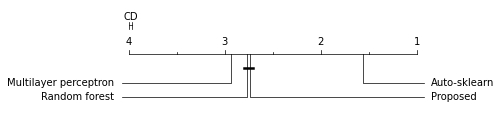

In [245]:
plot_stats(result)
plt.show()

In [246]:
import matplotlib

In [247]:
def create_rankings(bootstrap_df):
    
    models = ["Auto-sklearn", "Gaussian process regression", "Multilayer perceptron", \
              "Hybrid", "Hybrid-ensemble", "Random forest"]
    datasets = bootstrap_df["dataset"].unique()
    matplotlib.rcParams.update({'font.size': 14})
    for dataset in datasets:
        
        
        try:
            print(dataset)
            if(dataset=="in_situ_weekly_10m_filtered.csv"):
                result = autorank(bootstrap_df[bootstrap_df["dataset"]==dataset][["Auto-sklearn", "Multilayer perceptron",\
                                                                            "Hybrid", "Hybrid-ensemble", "Random forest"]]\
                                  .dropna(), alpha=0.05, verbose=True)
            
            else:
                result = autorank(bootstrap_df[bootstrap_df["dataset"]==dataset][models].dropna(), alpha=0.05, verbose=True)
                
            plot_stats(result)
            plt.savefig(os.path.join(plots_path, str(dataset)[:-4].replace("/", "_")+"_CD.pdf"), bbox_inches = 'tight')  

            plt.show()
            print("------")
        except Exception as e:
            print(e)
            print("Missing rows for dataset {}".format(dataset))
            
    for n_train in bootstrap_df["train_samples"].unique():
        
        
        try:
            print(n_train)
            result = autorank(bootstrap_df[bootstrap_df["train_samples"]==n_train][models].dropna(), alpha=0.05, verbose=True)
            plot_stats(result)
            plt.savefig(os.path.join(plots_path, str(n_train)+"_CD.pdf"), bbox_inches = 'tight') 
            plt.show()
            print("------")
        except:
            print("Missing rows for dataset {}".format(dataset))
    
    print("All datasets")
    result = autorank(bootstrap_df[models].dropna(), alpha=0.05, verbose=True)
    plot_stats(result)
    plt.savefig(os.path.join(plots_path, "all_CD.pdf"), bbox_inches = 'tight')                  
    plt.show()

In [248]:
bootstrap_df[(bootstrap_df["train_samples"]==100) & (bootstrap_df["dataset"]=="GBOV_RM07_in_situ.csv")].describe()

,Auto-sklearn,Gaussian process regression,Multilayer perceptron,Proposed,Proposed + ensemble,Random forest,train_samples,Auto-sklearn_rank,MLP_rank,Proposed_rank,Proposed + Ensemble_rank,RF_rank
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.697217,0.072281,0.681107,0.678578,0.723615,0.675345,100.0,2.696000,3.486000,3.537000,1.450000,3.83100
std,0.023796,0.393713,0.026328,0.031740,0.020062,0.019722,0.0,1.137047,1.217081,1.292401,0.859208,1.05525
min,0.600900,-1.130765,0.591234,0.556400,0.629471,0.603474,100.0,1.000000,1.000000,1.000000,1.000000,1.00000
25%,0.682331,-0.062948,0.663211,0.658699,0.711872,0.662267,100.0,2.000000,3.000000,2.000000,1.000000,3.00000
50%,0.697975,-0.016353,0.683661,0.681170,0.729609,0.675734,100.0,3.000000,4.000000,4.000000,1.000000,4.00000
75%,0.713767,0.336707,0.699873,0.701610,0.737084,0.687421,100.0,3.000000,5.000000,5.000000,2.000000,5.00000
max,0.765821,0.734651,0.741975,0.757243,0.767335,0.737897,100.0,5.000000,5.000000,5.000000,5.000000,5.00000


Fail to reject null hypothesis that data is normal for column Auto-sklearn (p=0.014166>=0.008333)
Rejecting null hypothesis that data is normal for column Gaussian process regression (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Multilayer perceptron (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Proposed (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Proposed + ensemble (p=0.000000<0.008333)
Fail to reject null hypothesis that data is normal for column Random forest (p=0.658922>=0.008333)
Using Levene's test for homoscedacity of non-normal data.
Rejecting null hypothesis that all variances are equal (p=0.000000<0.050000)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the critical distance.


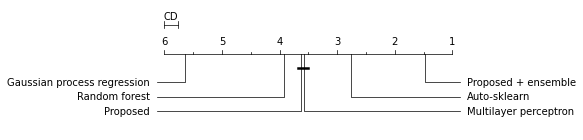

In [249]:
result = autorank(bootstrap_df[(bootstrap_df["train_samples"]==100) & (bootstrap_df["dataset"]=="GBOV_RM07_in_situ.csv")]\
                  [models].dropna(), alpha=0.05, verbose=True)
plot_stats(result)
plt.savefig(os.path.join(plots_path, "gbov_100_CD.pdf"), bbox_inches = 'tight') 
plt.show()

In [250]:
result.rankdf

,meanrank,median,mad,ci_lower,ci_upper,effect_size,magnitude
Proposed + ensemble,1.472,0.729609,0.014432,0.727672,0.731833,0.0,negligible
Auto-sklearn,2.763,0.697975,0.023355,0.69496,0.701364,1.629479,large
Multilayer perceptron,3.572,0.683661,0.02739,0.679758,0.686783,2.098903,large
Proposed,3.625,0.681170,0.031613,0.676084,0.685273,1.971229,large
Random forest,3.926,0.675734,0.018838,0.672337,0.678297,3.210628,large
Gaussian process regression,5.642,-0.016353,0.523222,-0.024675,0.31044,2.015487,large


In [251]:
result

RankResult(rankdf=                             meanrank    median       mad  ci_lower  ci_upper  \
Proposed + ensemble             1.472  0.729609  0.014432  0.727672  0.731833   
Auto-sklearn                    2.763  0.697975  0.023355   0.69496  0.701364   
Multilayer perceptron           3.572  0.683661   0.02739  0.679758  0.686783   
Proposed                        3.625  0.681170  0.031613  0.676084  0.685273   
Random forest                   3.926  0.675734  0.018838  0.672337  0.678297   
Gaussian process regression     5.642 -0.016353  0.523222 -0.024675   0.31044   

                            effect_size   magnitude  
Proposed + ensemble                 0.0  negligible  
Auto-sklearn                   1.629479       large  
Multilayer perceptron          2.098903       large  
Proposed                       1.971229       large  
Random forest                  3.210628       large  
Gaussian process regression    2.015487       large  , pvalue=0.0, cd=0.23842039815335572,

In [252]:
bootstrap_df[bootstrap_df["train_samples"]==50].mean()

Auto-sklearn                    0.243839
Gaussian process regression     0.084421
Multilayer perceptron           0.094207
Proposed                        0.164639
Proposed + ensemble             0.219054
Random forest                   0.210958
train_samples                  50.000000
Auto-sklearn_rank               2.349750
MLP_rank                        3.811500
Proposed_rank                   3.202250
Proposed + Ensemble_rank        2.586250
RF_rank                         3.050250
dtype: float64

In [253]:
bootstrap_df["train_samples"].value_counts()

50      4000
100     4000
2500    4000
1000    4000
250     4000
Name: train_samples, dtype: int64

In [254]:
bootstrap_df = bootstrap_df.rename(columns={"Proposed":"Hybrid", "Proposed + ensemble":"Hybrid-ensemble", \
                             "Proposed_rank":"Hybrid_rank", "Proposed + Ensemble_rank":"Hybrid-ensemble_rank"})

GBOV_RM07_in_situ.csv
Rejecting null hypothesis that data is normal for column Auto-sklearn (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Gaussian process regression (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Multilayer perceptron (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Hybrid (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Hybrid-ensemble (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Random forest (p=0.000000<0.008333)
Using Levene's test for homoscedacity of non-normal data.
Rejecting null hypothesis that all variances are equal (p=0.000000<0.050000)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the critical distance.


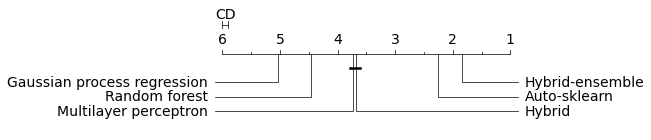

------
NFI_Sweden/in_situ_inc_SAR.csv
Rejecting null hypothesis that data is normal for column Auto-sklearn (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Gaussian process regression (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Multilayer perceptron (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Hybrid (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Hybrid-ensemble (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Random forest (p=0.000000<0.008333)
Using Levene's test for homoscedacity of non-normal data.
Rejecting null hypothesis that all variances are equal (p=0.000000<0.050000)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the critical

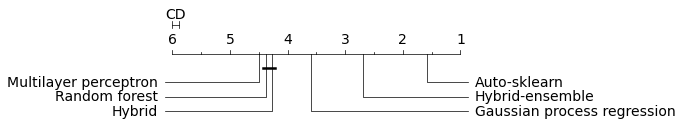

------
in_situ_weekly_10m_filtered.csv
Rejecting null hypothesis that data is normal for column Auto-sklearn (p=0.000000<0.010000)
Rejecting null hypothesis that data is normal for column Multilayer perceptron (p=0.000000<0.010000)
Rejecting null hypothesis that data is normal for column Hybrid (p=0.000000<0.010000)
Rejecting null hypothesis that data is normal for column Hybrid-ensemble (p=0.000000<0.010000)
Rejecting null hypothesis that data is normal for column Random forest (p=0.000000<0.010000)
Using Levene's test for homoscedacity of non-normal data.
Rejecting null hypothesis that all variances are equal (p=0.000000<0.050000)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the critical distance.


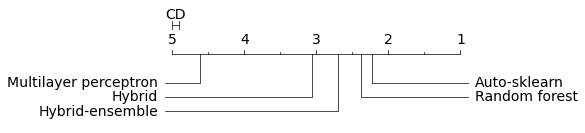

------
in_situ_MERIS.csv
Rejecting null hypothesis that data is normal for column Auto-sklearn (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Gaussian process regression (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Multilayer perceptron (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Hybrid (p=0.000018<0.008333)
Rejecting null hypothesis that data is normal for column Hybrid-ensemble (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Random forest (p=0.000000<0.008333)
Using Levene's test for homoscedacity of non-normal data.
Rejecting null hypothesis that all variances are equal (p=0.000000<0.050000)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the critical distance.


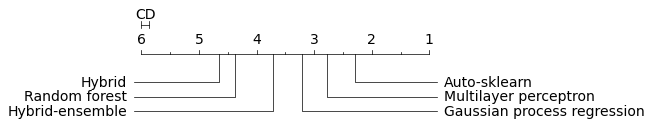

------
50
Rejecting null hypothesis that data is normal for column Auto-sklearn (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Gaussian process regression (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Multilayer perceptron (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Hybrid (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Hybrid-ensemble (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Random forest (p=0.000000<0.008333)
Using Levene's test for homoscedacity of non-normal data.
Rejecting null hypothesis that all variances are equal (p=0.000000<0.050000)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the critical distance.


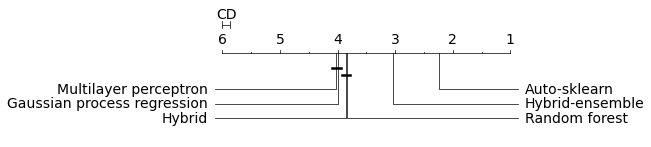

------
100
Rejecting null hypothesis that data is normal for column Auto-sklearn (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Gaussian process regression (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Multilayer perceptron (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Hybrid (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Hybrid-ensemble (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Random forest (p=0.000000<0.008333)
Using Levene's test for homoscedacity of non-normal data.
Rejecting null hypothesis that all variances are equal (p=0.000000<0.050000)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the critical distance.


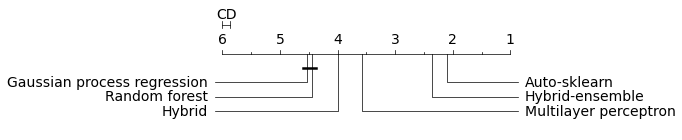

------
250
Rejecting null hypothesis that data is normal for column Auto-sklearn (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Gaussian process regression (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Multilayer perceptron (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Hybrid (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Hybrid-ensemble (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Random forest (p=0.000000<0.008333)
Using Levene's test for homoscedacity of non-normal data.
Rejecting null hypothesis that all variances are equal (p=0.000000<0.050000)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the critical distance.


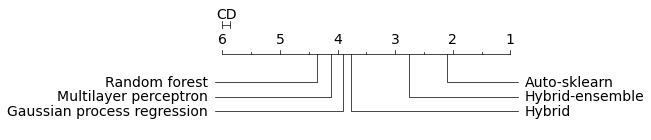

------
1000
Rejecting null hypothesis that data is normal for column Auto-sklearn (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Gaussian process regression (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Multilayer perceptron (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Hybrid (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Hybrid-ensemble (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Random forest (p=0.000000<0.008333)
Using Levene's test for homoscedacity of non-normal data.
Rejecting null hypothesis that all variances are equal (p=0.000000<0.050000)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the critical distance.


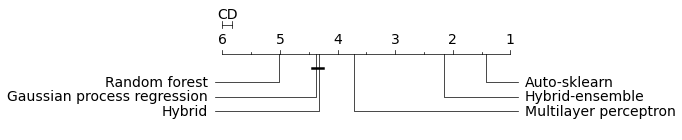

------
2500
Rejecting null hypothesis that data is normal for column Auto-sklearn (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Gaussian process regression (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Multilayer perceptron (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Hybrid (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Hybrid-ensemble (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Random forest (p=0.000000<0.008333)
Using Levene's test for homoscedacity of non-normal data.
Rejecting null hypothesis that all variances are equal (p=0.000000<0.050000)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the critical distance.


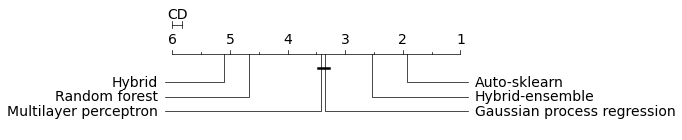

------
All datasets
Rejecting null hypothesis that data is normal for column Auto-sklearn (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Gaussian process regression (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Multilayer perceptron (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Hybrid (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Hybrid-ensemble (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Random forest (p=0.000000<0.008333)
Using Levene's test for homoscedacity of non-normal data.
Rejecting null hypothesis that all variances are equal (p=0.000000<0.050000)
Using Friedman test as omnibus test


C:\Users\victo\AppData\Local\Continuum\anaconda3\envs\master-thesis\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the critical distance.


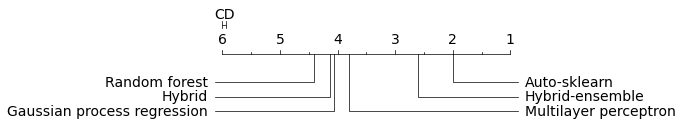

In [255]:
create_rankings(bootstrap_df)

In [256]:
help(autorank)

Help on function autorank in module autorank.autorank:

autorank(data, alpha=0.05, verbose=False, order='descending', approach='frequentist', rope=0.1, rope_mode='effsize', nsamples=50000, effect_size=None)
    Automatically compares populations defined in a block-design data frame. Each column in the data frame contains
    the samples for one population. The data must not contain any NaNs. The data must have at least five measurements,
    i.e., rows. The current version is only reliable for less than 5000 measurements.
    
    The following approach is implemented by this function.
    
    - First all columns are checked with the Shapiro-Wilk test for normality. We use Bonferoni correction for these
      tests, i.e., alpha/len(data.columns).
    - If all columns are normal, we use Bartlett's test for homogeneity, otherwise we use Levene's test.
    - Based on the normality and the homogeneity, we select appropriate tests, effect sizes, and methods for determining
      the confid

In [257]:
def get_results_tables(df):
    
    
    default_model_cols = ["Random forest", "Gaussian process regression", "Multilayer perceptron",  \
              "Auto-sklearn", "Hybrid", "Hybrid-ensemble"]
    
    yield_model_cols = ["Random forest", "Multilayer perceptron",  \
              "Auto-sklearn", "Hybrid", "Hybrid-ensemble"]
            
    simulation_only_model_cols = ["Random forest", "Gaussian process regression", "Multilayer perceptron",  \
              "Auto-sklearn"]
    
    datasets = df["dataset"].unique()
    train_sizes = df["train_samples"].unique()
    tables = {dataset:[] for dataset in datasets}
    models = default_model_cols
            
    for dataset in datasets:
        for train_size in train_sizes:
            try:
                if train_size==0:
                    model_cols = simulation_only_model_cols
                elif dataset == "in_situ_weekly_10m_filtered.csv":
                    model_cols = yield_model_cols
                else:
                    model_cols = default_model_cols
                    
                print(dataset, train_size)
                sub_df = df[(df["train_samples"]==train_size) & (df["dataset"]==dataset)]
                row = {"Training samples":train_size}
                for model in model_cols:
                    row[str(model)+" (mean)"] = sub_df[model].mean()
                    row[str(model)+" (std)"] = sub_df[model].std()

                # Row with (mean, std R2) per model, training size
                tables[dataset].append(row)

                

                result = autorank(sub_df[model_cols]\
                                      .dropna(), alpha=0.05, verbose=True)

                plot_stats(result)
                plt.show()
                print("-----")
            except Exception as e:
                print(e)
            
    return tables

In [258]:
bootstrap_zero = create_bootstrap_df(df, train_samples=[0], datasets=['GBOV_RM07_in_situ.csv', 'in_situ_MERIS.csv'])

  0%|          | 0/1000 [00:00<?, ?it/s]

GBOV_RM07_in_situ.csv 50
Rejecting null hypothesis that data is normal for column Random forest (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Gaussian process regression (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Multilayer perceptron (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Auto-sklearn (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Hybrid (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Hybrid-ensemble (p=0.000001<0.008333)
Using Levene's test for homoscedacity of non-normal data.
Rejecting null hypothesis that all variances are equal (p=0.000000<0.050000)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the critical distance.


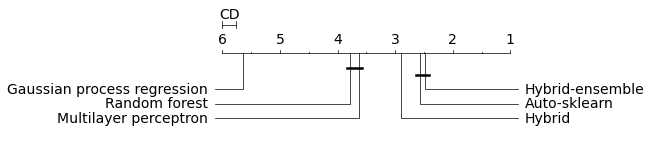

-----
GBOV_RM07_in_situ.csv 100
Fail to reject null hypothesis that data is normal for column Random forest (p=0.658922>=0.008333)
Rejecting null hypothesis that data is normal for column Gaussian process regression (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Multilayer perceptron (p=0.000000<0.008333)
Fail to reject null hypothesis that data is normal for column Auto-sklearn (p=0.014166>=0.008333)
Rejecting null hypothesis that data is normal for column Hybrid (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Hybrid-ensemble (p=0.000000<0.008333)
Using Levene's test for homoscedacity of non-normal data.
Rejecting null hypothesis that all variances are equal (p=0.000000<0.050000)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the cr

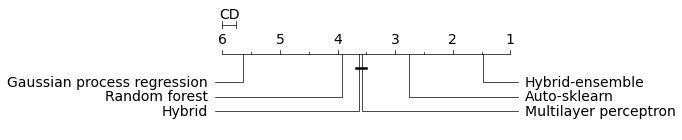

-----
GBOV_RM07_in_situ.csv 250
Fail to reject null hypothesis that data is normal for column Random forest (p=0.015410>=0.008333)
Rejecting null hypothesis that data is normal for column Gaussian process regression (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Multilayer perceptron (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Auto-sklearn (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Hybrid (p=0.000019<0.008333)
Rejecting null hypothesis that data is normal for column Hybrid-ensemble (p=0.000000<0.008333)
Using Levene's test for homoscedacity of non-normal data.
Rejecting null hypothesis that all variances are equal (p=0.000000<0.050000)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the critical

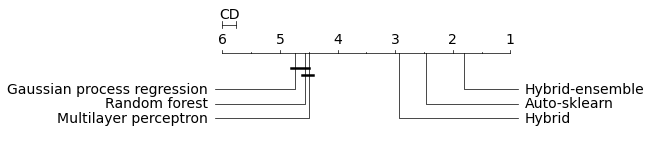

-----
GBOV_RM07_in_situ.csv 1000
Fail to reject null hypothesis that data is normal for column Random forest (p=0.036757>=0.008333)
Rejecting null hypothesis that data is normal for column Gaussian process regression (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Multilayer perceptron (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Auto-sklearn (p=0.000052<0.008333)
Fail to reject null hypothesis that data is normal for column Hybrid (p=0.014567>=0.008333)
Fail to reject null hypothesis that data is normal for column Hybrid-ensemble (p=0.061138>=0.008333)
Using Levene's test for homoscedacity of non-normal data.
Rejecting null hypothesis that all variances are equal (p=0.000000<0.050000)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than

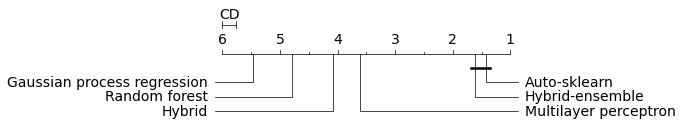

-----
GBOV_RM07_in_situ.csv 2500
Fail to reject null hypothesis that data is normal for column Random forest (p=0.735769>=0.008333)
Rejecting null hypothesis that data is normal for column Gaussian process regression (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Multilayer perceptron (p=0.000485<0.008333)
Fail to reject null hypothesis that data is normal for column Auto-sklearn (p=0.014738>=0.008333)
Fail to reject null hypothesis that data is normal for column Hybrid (p=0.691237>=0.008333)
Rejecting null hypothesis that data is normal for column Hybrid-ensemble (p=0.000074<0.008333)
Using Levene's test for homoscedacity of non-normal data.
Rejecting null hypothesis that all variances are equal (p=0.000000<0.050000)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than

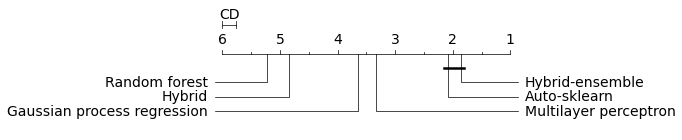

-----
NFI_Sweden/in_situ_inc_SAR.csv 50
Rejecting null hypothesis that data is normal for column Random forest (p=0.000000<0.008333)
Fail to reject null hypothesis that data is normal for column Gaussian process regression (p=0.016189>=0.008333)
Rejecting null hypothesis that data is normal for column Multilayer perceptron (p=0.000000<0.008333)
Fail to reject null hypothesis that data is normal for column Auto-sklearn (p=0.076305>=0.008333)
Rejecting null hypothesis that data is normal for column Hybrid (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Hybrid-ensemble (p=0.000000<0.008333)
Using Levene's test for homoscedacity of non-normal data.
Rejecting null hypothesis that all variances are equal (p=0.000000<0.050000)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater tha

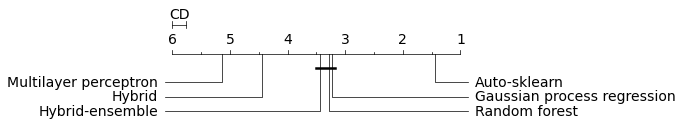

-----
NFI_Sweden/in_situ_inc_SAR.csv 100
Rejecting null hypothesis that data is normal for column Random forest (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Gaussian process regression (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Multilayer perceptron (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Auto-sklearn (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Hybrid (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Hybrid-ensemble (p=0.000046<0.008333)
Using Levene's test for homoscedacity of non-normal data.
Rejecting null hypothesis that all variances are equal (p=0.000000<0.050000)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the criti

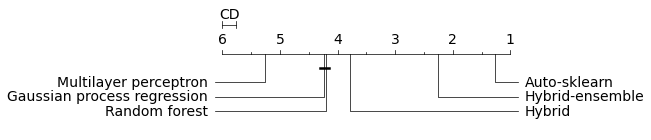

-----
NFI_Sweden/in_situ_inc_SAR.csv 250
Rejecting null hypothesis that data is normal for column Random forest (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Gaussian process regression (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Multilayer perceptron (p=0.000000<0.008333)
Fail to reject null hypothesis that data is normal for column Auto-sklearn (p=0.015428>=0.008333)
Rejecting null hypothesis that data is normal for column Hybrid (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Hybrid-ensemble (p=0.000000<0.008333)
Using Levene's test for homoscedacity of non-normal data.
Rejecting null hypothesis that all variances are equal (p=0.000000<0.050000)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the

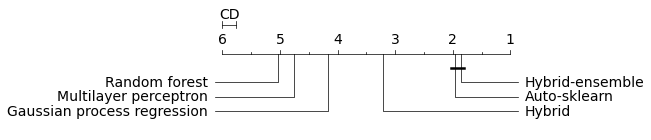

-----
NFI_Sweden/in_situ_inc_SAR.csv 1000
Rejecting null hypothesis that data is normal for column Random forest (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Gaussian process regression (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Multilayer perceptron (p=0.000000<0.008333)
Fail to reject null hypothesis that data is normal for column Auto-sklearn (p=0.702884>=0.008333)
Rejecting null hypothesis that data is normal for column Hybrid (p=0.000082<0.008333)
Fail to reject null hypothesis that data is normal for column Hybrid-ensemble (p=0.838146>=0.008333)
Using Levene's test for homoscedacity of non-normal data.
Rejecting null hypothesis that all variances are equal (p=0.000000<0.050000)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater t

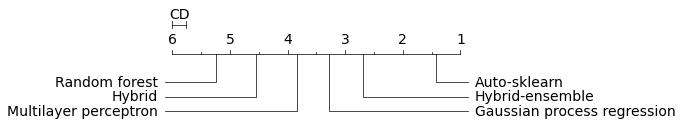

-----
NFI_Sweden/in_situ_inc_SAR.csv 2500
Rejecting null hypothesis that data is normal for column Random forest (p=0.002463<0.008333)
Rejecting null hypothesis that data is normal for column Gaussian process regression (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Multilayer perceptron (p=0.000000<0.008333)
Fail to reject null hypothesis that data is normal for column Auto-sklearn (p=0.009659>=0.008333)
Fail to reject null hypothesis that data is normal for column Hybrid (p=0.023847>=0.008333)
Rejecting null hypothesis that data is normal for column Hybrid-ensemble (p=0.000000<0.008333)
Using Levene's test for homoscedacity of non-normal data.
Rejecting null hypothesis that all variances are equal (p=0.000000<0.050000)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater t

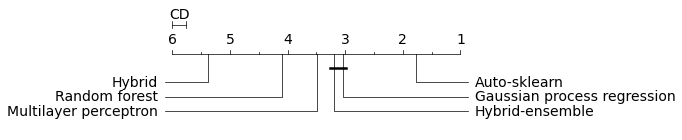

-----
in_situ_weekly_10m_filtered.csv 50
Fail to reject null hypothesis that data is normal for column Random forest (p=0.113921>=0.010000)
Rejecting null hypothesis that data is normal for column Multilayer perceptron (p=0.000003<0.010000)
Rejecting null hypothesis that data is normal for column Auto-sklearn (p=0.000000<0.010000)
Rejecting null hypothesis that data is normal for column Hybrid (p=0.000000<0.010000)
Rejecting null hypothesis that data is normal for column Hybrid-ensemble (p=0.000000<0.010000)
Using Levene's test for homoscedacity of non-normal data.
Rejecting null hypothesis that all variances are equal (p=0.000000<0.050000)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the critical distance.


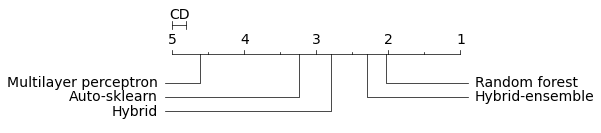

-----
in_situ_weekly_10m_filtered.csv 100
Rejecting null hypothesis that data is normal for column Random forest (p=0.000000<0.010000)
Rejecting null hypothesis that data is normal for column Multilayer perceptron (p=0.000000<0.010000)
Rejecting null hypothesis that data is normal for column Auto-sklearn (p=0.000000<0.010000)
Rejecting null hypothesis that data is normal for column Hybrid (p=0.000000<0.010000)
Rejecting null hypothesis that data is normal for column Hybrid-ensemble (p=0.000000<0.010000)
Using Levene's test for homoscedacity of non-normal data.
Rejecting null hypothesis that all variances are equal (p=0.000000<0.050000)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the critical distance.


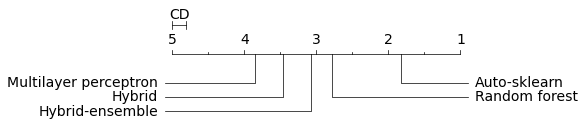

-----
in_situ_weekly_10m_filtered.csv 250
Fail to reject null hypothesis that data is normal for column Random forest (p=0.436714>=0.010000)
Rejecting null hypothesis that data is normal for column Multilayer perceptron (p=0.000088<0.010000)
Rejecting null hypothesis that data is normal for column Auto-sklearn (p=0.000594<0.010000)
Rejecting null hypothesis that data is normal for column Hybrid (p=0.000000<0.010000)
Rejecting null hypothesis that data is normal for column Hybrid-ensemble (p=0.000000<0.010000)
Using Levene's test for homoscedacity of non-normal data.
Rejecting null hypothesis that all variances are equal (p=0.000000<0.050000)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the critical distance.


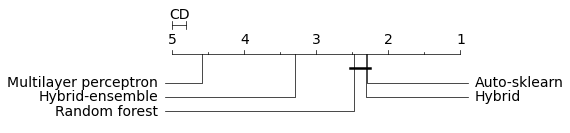

-----
in_situ_weekly_10m_filtered.csv 1000
Rejecting null hypothesis that data is normal for column Random forest (p=0.000002<0.010000)
Fail to reject null hypothesis that data is normal for column Multilayer perceptron (p=0.149705>=0.010000)
Fail to reject null hypothesis that data is normal for column Auto-sklearn (p=0.440292>=0.010000)
Rejecting null hypothesis that data is normal for column Hybrid (p=0.000000<0.010000)
Fail to reject null hypothesis that data is normal for column Hybrid-ensemble (p=0.249050>=0.010000)
Using Levene's test for homoscedacity of non-normal data.
Rejecting null hypothesis that all variances are equal (p=0.000000<0.050000)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the critical distance.


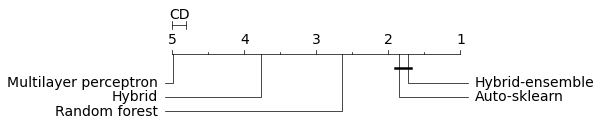

-----
in_situ_weekly_10m_filtered.csv 2500
Fail to reject null hypothesis that data is normal for column Random forest (p=0.353324>=0.010000)
Rejecting null hypothesis that data is normal for column Multilayer perceptron (p=0.003472<0.010000)
Rejecting null hypothesis that data is normal for column Auto-sklearn (p=0.002478<0.010000)
Fail to reject null hypothesis that data is normal for column Hybrid (p=0.773151>=0.010000)
Rejecting null hypothesis that data is normal for column Hybrid-ensemble (p=0.006748<0.010000)
Using Levene's test for homoscedacity of non-normal data.
Rejecting null hypothesis that all variances are equal (p=0.000000<0.050000)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the critical distance.


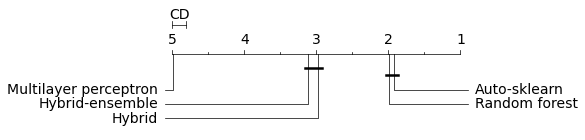

-----
in_situ_MERIS.csv 50
Fail to reject null hypothesis that data is normal for column Random forest (p=0.086886>=0.008333)
Fail to reject null hypothesis that data is normal for column Gaussian process regression (p=0.717025>=0.008333)
Rejecting null hypothesis that data is normal for column Multilayer perceptron (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Auto-sklearn (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Hybrid (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Hybrid-ensemble (p=0.000000<0.008333)
Using Levene's test for homoscedacity of non-normal data.
Rejecting null hypothesis that all variances are equal (p=0.000000<0.050000)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the critica

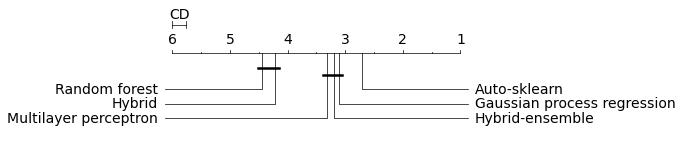

-----
in_situ_MERIS.csv 100
Rejecting null hypothesis that data is normal for column Random forest (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Gaussian process regression (p=0.000002<0.008333)
Rejecting null hypothesis that data is normal for column Multilayer perceptron (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Auto-sklearn (p=0.000827<0.008333)
Rejecting null hypothesis that data is normal for column Hybrid (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Hybrid-ensemble (p=0.000000<0.008333)
Using Levene's test for homoscedacity of non-normal data.
Rejecting null hypothesis that all variances are equal (p=0.000000<0.050000)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the critical distance.

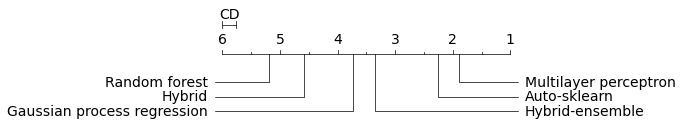

-----
in_situ_MERIS.csv 250
Fail to reject null hypothesis that data is normal for column Random forest (p=0.052923>=0.008333)
Rejecting null hypothesis that data is normal for column Gaussian process regression (p=0.000196<0.008333)
Rejecting null hypothesis that data is normal for column Multilayer perceptron (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Auto-sklearn (p=0.000000<0.008333)
Rejecting null hypothesis that data is normal for column Hybrid (p=0.000000<0.008333)
Fail to reject null hypothesis that data is normal for column Hybrid-ensemble (p=0.053174>=0.008333)
Using Levene's test for homoscedacity of non-normal data.
Rejecting null hypothesis that all variances are equal (p=0.000000<0.050000)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the critic

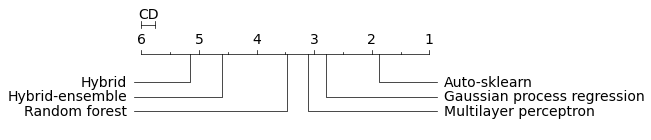

-----
in_situ_MERIS.csv 1000
requires at least five performance estimations (i.e., rows)
in_situ_MERIS.csv 2500
requires at least five performance estimations (i.e., rows)


In [259]:
tables = get_results_tables(bootstrap_df)

GBOV_RM07_in_situ.csv 0
Fail to reject null hypothesis that data is normal for column Random forest (p=0.211905>=0.012500)
Fail to reject null hypothesis that data is normal for column Gaussian process regression (p=0.948975>=0.012500)
Fail to reject null hypothesis that data is normal for column Multilayer perceptron (p=0.454123>=0.012500)
Fail to reject null hypothesis that data is normal for column Auto-sklearn (p=0.612980>=0.012500)
Using Bartlett's test for homoscedacity of normally distributed data
Rejecting null hypothesis that all variances are equal (p=0.000000<0.050000)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the critical distance.


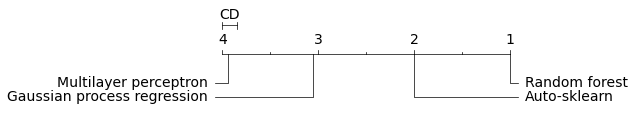

-----
in_situ_MERIS.csv 0
Rejecting null hypothesis that data is normal for column Random forest (p=0.000000<0.012500)
Rejecting null hypothesis that data is normal for column Gaussian process regression (p=0.000000<0.012500)
Rejecting null hypothesis that data is normal for column Multilayer perceptron (p=0.000000<0.012500)
Rejecting null hypothesis that data is normal for column Auto-sklearn (p=0.009232<0.012500)
Using Levene's test for homoscedacity of non-normal data.
Rejecting null hypothesis that all variances are equal (p=0.000000<0.050000)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the critical distance.


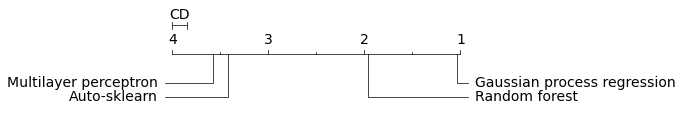

-----


In [260]:
tables_zero = get_results_tables(bootstrap_zero)

In [261]:
def get_multilevel_columns(df, zero=False):
    if zero:
        level1 = ["Random forest", "Random forest", "Gaussian process regression", "Gaussian process regression", \
          "Multilayer perceptron", "Multilayer perceptron", "Auto-sklearn", "Auto-sklearn"]
    else:
        level1 = ["Random forest", "Random forest", "Gaussian process regression", "Gaussian process regression", \
          "Multilayer perceptron", "Multilayer perceptron", "Auto-sklearn", "Auto-sklearn",\
          "Hybrid", "Hybrid", "Hybrid-ensemble",  "Hybrid-ensemble"]
    
    level2 = ["mean", "std"] * int(len(level1)/2)
    
    df.columns = pd.MultiIndex.from_arrays([level1, level2])
    return df

In [262]:
print(get_multilevel_columns(pd.DataFrame(tables['GBOV_RM07_in_situ.csv']).set_index("Training samples")).to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} & \multicolumn{2}{l}{Random forest} & \multicolumn{2}{l}{Gaussian process regression} & \multicolumn{2}{l}{Multilayer perceptron} & \multicolumn{2}{l}{Auto-sklearn} & \multicolumn{2}{l}{Hybrid} & \multicolumn{2}{l}{Hybrid-ensemble} \\
{} &          mean &  std &                        mean &  std &                  mean &  std &         mean &  std &   mean &  std &            mean &  std \\
Training samples &               &      &                             &      &                       &      &              &      &        &      &                 &      \\
\midrule
50               &          0.58 & 0.05 &                        0.05 & 0.37 &                  0.58 & 0.07 &         0.62 & 0.06 &   0.62 & 0.04 &            0.63 & 0.04 \\
100              &          0.68 & 0.02 &                        0.07 & 0.39 &                  0.68 & 0.03 &         0.70 & 0.02 &   0.68 & 0.03 &            0.72 & 0.02 \\
250              &          0.7

In [263]:
print(get_multilevel_columns(pd.DataFrame(tables_zero['GBOV_RM07_in_situ.csv']).set_index("Training samples"), zero=True).to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrrrrr}
\toprule
{} & \multicolumn{2}{l}{Random forest} & \multicolumn{2}{l}{Gaussian process regression} & \multicolumn{2}{l}{Multilayer perceptron} & \multicolumn{2}{l}{Auto-sklearn} \\
{} &          mean &  std &                        mean &  std &                  mean &  std &         mean &  std \\
Training samples &               &      &                             &      &                       &      &              &      \\
\midrule
0                &          0.43 & 0.01 &                       -1.13 & 0.00 &                 -2.36 & 0.75 &         0.29 & 0.01 \\
\bottomrule
\end{tabular}



In [264]:
print(get_multilevel_columns(pd.DataFrame(tables['in_situ_MERIS.csv']).set_index("Training samples").dropna()).to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} & \multicolumn{2}{l}{Random forest} & \multicolumn{2}{l}{Gaussian process regression} & \multicolumn{2}{l}{Multilayer perceptron} & \multicolumn{2}{l}{Auto-sklearn} & \multicolumn{2}{l}{Hybrid} & \multicolumn{2}{l}{Hybrid-ensemble} \\
{} &          mean &  std &                        mean &  std &                  mean &  std &         mean &  std &   mean &  std &            mean &  std \\
Training samples &               &      &                             &      &                       &      &              &      &        &      &                 &      \\
\midrule
50               &          0.22 & 0.05 &                        0.27 & 0.06 &                  0.22 & 0.22 &         0.29 & 0.06 &   0.22 & 0.08 &            0.26 & 0.07 \\
100              &          0.32 & 0.08 &                        0.40 & 0.06 &                  0.49 & 0.07 &         0.46 & 0.05 &   0.36 & 0.06 &            0.41 & 0.08 \\
250              &          0.5

In [265]:
print(get_multilevel_columns(pd.DataFrame(tables_zero['in_situ_MERIS.csv']).set_index("Training samples").dropna(), zero=True).to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrrrrr}
\toprule
{} & \multicolumn{2}{l}{Random forest} & \multicolumn{2}{l}{Gaussian process regression} & \multicolumn{2}{l}{Multilayer perceptron} & \multicolumn{2}{l}{Auto-sklearn} \\
{} &          mean &  std &                        mean &  std &                  mean &  std &         mean &  std \\
Training samples &               &      &                             &      &                       &      &              &      \\
\midrule
0                &         -0.91 & 0.49 &                       -0.11 & 0.03 &                 -9.85 & 5.32 &        -8.26 & 3.00 \\
\bottomrule
\end{tabular}



In [266]:
print((pd.DataFrame(tables['NFI_Sweden/in_situ_inc_SAR.csv'])).set_index("Training samples").to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &  Random forest (mean) &  Random forest (std) &  Gaussian process regression (mean) &  Gaussian process regression (std) &  Multilayer perceptron (mean) &  Multilayer perceptron (std) &  Auto-sklearn (mean) &  Auto-sklearn (std) &  Hybrid (mean) &  Hybrid (std) &  Hybrid-ensemble (mean) &  Hybrid-ensemble (std) \\
Training samples &                       &                      &                                     &                                    &                               &                              &                      &                     &                &               &                         &                        \\
\midrule
50               &                 -0.08 &                 0.09 &                               -0.07 &                               0.04 &                         -0.36 &                         0.28 &                 0.01 &                0.04 &          -0.25 &          0.27 &                

In [267]:
(pd.DataFrame(tables['in_situ_weekly_10m_filtered.csv'])\
    .drop(columns=["Gaussian process regression (mean)", "Gaussian process regression (std)"])\
    .set_index("Training samples")\
    )

KeyError: "['Gaussian process regression (mean)' 'Gaussian process regression (std)'] not found in axis"